In [1]:
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from folium import plugins
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv("../../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
data.Date = pd.to_datetime(data.Date)
data['Hour'] = pd.to_datetime(data.Time).dt.hour
data['DayOfWeek'] = data.Date.dt.dayofweek
data['Month'] = data.Date.dt.month
data['Minutes'] = pd.to_datetime(data.Time).dt.minute
data['X'] = data['X'].astype(float)
data['Y'] = data['Y'].astype(float)

## Part 5: Heatmaps of geo-data

### Exercise: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials).

#### Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

#### First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.

In [3]:
map_sf = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
map_sf

#### Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker.

In [4]:
map_sf = folium.Map(location=[37.77919, -122.41914],
                        tiles="Stamen Toner", zoom_start = 12)
folium.Marker([37.77919, -122.41914], popup="City Hall").add_to(map_sf)
map_sf

#### Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.


In [5]:
drug = data[(data.Category == "DRUG/NARCOTIC") &\
           (data.Date.dt.year == 2016) &\
           (data.Date.dt.month <= 7) &\
           (data.Date.dt.month >= 6)]

In [6]:
map_drug = folium.Map(location=[37.773972, -122.431297], zoom_start = 13)
for index, row in drug.iterrows():
    folium.CircleMarker([row.Y, row.X],fill_color='#43d9de', radius=2).add_to(map_drug)
map_drug

### Next, let's play with heatmaps. You can figure out the appropriate commands by grabbing code from the main tutorial) and modifying to suit your needs.

#### To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.

In [7]:
sex_data = data[data.Category == "SEX OFFENSES, NON FORCIBLE"]

In [8]:
map_sex = folium.Map(location=[37.763972, -122.431297], zoom_start = 12)
heat_data = [[row.Y,row.X] for index, row in sex_data.iterrows()]
HeatMap(heat_data, radius=20, max_zoom=20).add_to(map_sex)
map_sex

The maps parameters have been adjusted to be centered in San Francisco and at a zoom level which allows to have an overview of the distribution and intensity of the SEX OFFENSES crime over the whole city. 

The radius has also been adjusted to a smaller value than the default one, in order to show a more precise representation of the distribution. The default value resulted in a very wide red area which was not expressing accurately the higher intensity in some areas at this zoom level.

#### Now, comment on the differences between scatter plots and heatmaps. What can you see using the scatter-plots that you can't see using the heatmaps? And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

Heatmaps allow to easily visualize how dense of points an area on the map is, and immediately compare different densities from different areas to identify the one with the highest one. In a scatter plot points may overlap each other, and although it is possible to identify the most involved areas, it is not immediatly clear the density of a specific area, and it is therefore not easy to compare it with other ones.

On the other hand, heatmaps loose granularity and details since they do not plot each single crime occurrence individually but instead group them toghether in more smooth colored shapes. Scatter plot keep the detailed representation of each single occurrence and this can be desired in some cases.

#### Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html

In [9]:
zoom = 13
sex_map_params = folium.Map(location=[37.773972, -122.431297], zoom_start = 5)
HeatMap(heat_data, blur=15, radius=20).add_to(sex_map_params)
sex_map_params

#### Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom). For one combination of settings, my heatmap plot looks like this.

By increasing the radius, we get less granularity and allow the map to aggregate points on a wider area. On the other hand, decreasing it will create geographically smaller aggregations of points and will colour red only very condensed aggregations of points, as for example our data has around the Hall of Justice. The radius should be changed according to the size of the areas we want to aggregate points from. For example if there is an interesting known risk-radius for a certain crime, the radius can be changed accordingly, or relative to the size of the area analyzed (i.e. for Copenhagen it would probably be wise to use a small radius, as crimes are locally more centered around hotspots, but if looking at the entirety of crimes in Denmark it may be wiser to have a larger radius).

Max_zoom allows to get the highest intensity of the points at the desired level of zoom. If max_zoom is high, the more we zoom in the map, the more intense the points will get (until we reach the max_zoom level). The lower the max_zoom the sooner the points will reach their highest intensity (given by the color, red for highest) and therefore, zooming in won't add much coloring information as it has already reached its highest intensity. Max_zoom should be adjusted according to the zoom level the map will be mostly looked at. If we are reppresenting data on a world scala and want to communicate the intensity of areas right at the user with no need of zooming in, it may be interesting to show the max intensity at a low level of zoom.

![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png)
#### In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words. 

In [10]:
...

Ellipsis

#### Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).

The DISORDERLY CONDUCT crime has been chosen

In [11]:
crime = "DISORDERLY CONDUCT"
crime_data = data[data.Category == crime]

#### Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.

The hourly pattern has been chosen

In [12]:
crime_data = crime_data.dropna(axis=0, subset=['X','Y', 'Hour'])

#### Create the movie using HeatMapWithTime

In [13]:
crime_heat_data = [[[row.Y,row.X]\
              for index, row in crime_data[(crime_data['Hour'] == j)]\
                   .iterrows()] for j in range(0,24)]

In [14]:
heat_map = folium.Map(location=[37.773972, -122.431297], zoom_start = 12)
folium.Marker([37.759588, -122.416461], popup="Mission").add_to(heat_map)
folium.Marker([37.784235, -122.413997], popup="Tenderloin").add_to(heat_map)
#
hm = plugins.HeatMapWithTime(crime_heat_data,auto_play=True,\
                             radius=10,\
                             name="Disorderly")
hm.add_to(heat_map)
# Display the map
heat_map

#### Comment on your results:
 * What patterns does your movie reveal?
 * Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

The movie reveals a specific pattern for the Disorderly Conduct crime: a spike in crimes takes place around 6-9 a.m and is concentrated in two main areas of the city districts: Mission and Tenderloin.
This information is useful for example in case the Police Department wanted to investigate further the causes of this specific behavior or wanted to increase the number of police forces in those areas during peak hours for fighting it.

The reason for plotting this specific crime on this time-resolution lies in a data analysis which has highlighted an interesting behavior for this crime type. Plotting all the focus crimes on an hourly basis showed that DISORDERLY CONDUCT had a peak crimes in a specific time window going from 6 to 9 in the morning and decreasing from there. It also showed another small peak around midnight.

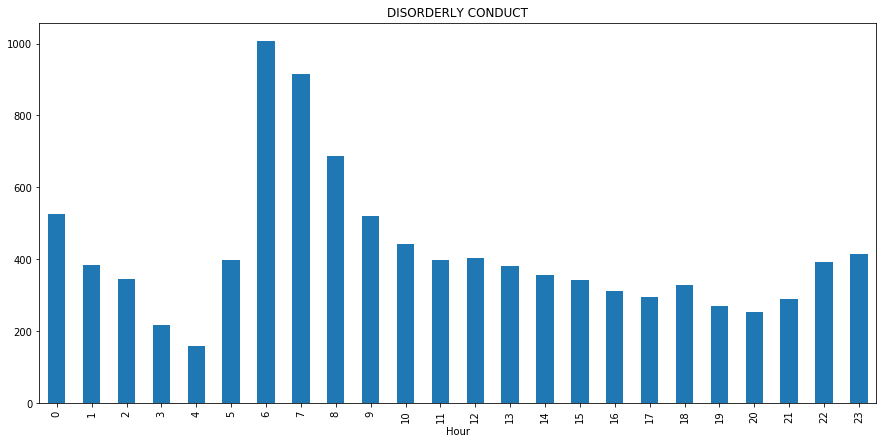

In [15]:
crime_data.groupby(data.Hour).count().IncidntNum.plot(kind='bar',title="DISORDERLY CONDUCT", figsize=(15,7))

Plotting the Latitude coordinate for focus crimes in a histogram, has showed that DISORDERLY CONDUCT has a specific area in which it occurs more frequently. Longitude has also been plotted and has shown a similar result.

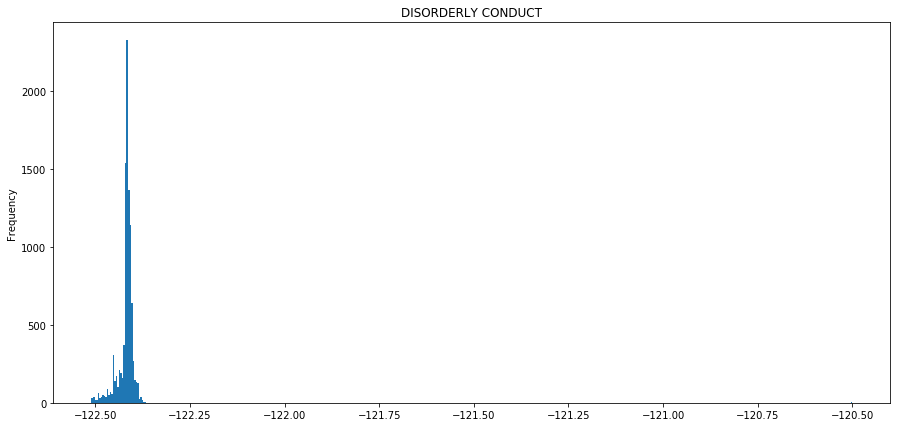

In [16]:
crime_data.X.plot(kind='hist',bins=500,title="DISORDERLY CONDUCT", figsize=(15,7))

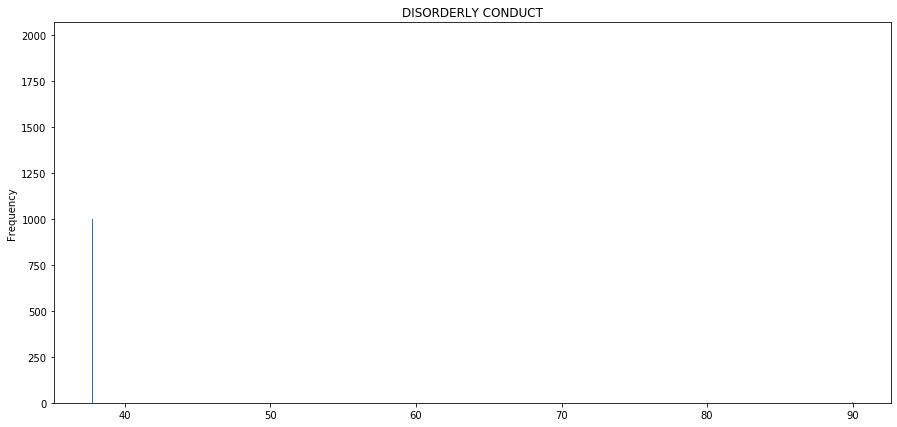

In [17]:
crime_data.Y.plot(kind='hist',bins=10000,title="DISORDERLY CONDUCT", figsize=(15,7))

The interesting hourly and geographical patterns suited well a plotting tool such as the HeatMapWithTime which allows to combine the two different types of pattern in one visual and dynamic plot. The HeatMapWithTime has highlighted two main areas in which this type of crime takes place. A further anlysis plotting the distribution of occurrences of DIORDERLY CONDUCT in the different Police Department Districts, allowed to identify the two main affected ones: Mission and Tenderloin. Adding a marker for these districts on the HeatMapWithTime has shown to match with the main red areas.

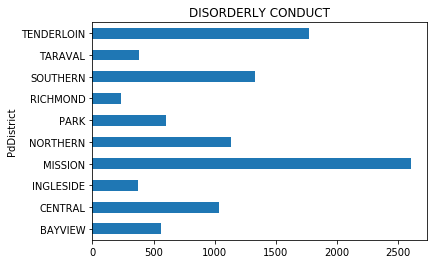

In [18]:
crime_data.groupby(crime_data.PdDistrict).count().IncidntNum.plot(kind='barh', title="DISORDERLY CONDUCT")